In [ ]:
import numpy as np
import torch
from torch import nn
from torch import optim
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

Run the random seed function

In [ ]:
np.random.seed(42)
torch.manual_seed(42)

In [ ]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

x = torch.arange(10)
print("Tensor x:", x)
print("Tensor x Device (CPU):", x.device)

# Move the model and tensors to GPU if available
x.to(device)

print("Tensor x Device (GPU):", x.device)

Using device: cpu
Tensor x: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Tensor x Device (CPU): cpu
Tensor x Device (GPU): cpu


Global varibels

In [ ]:
LAMBDA = [0 , 2 , 4 , 6 , 8 , 10]
TRINING_LABEL = ['Training accuracy' , 'Validation accuracy' ,  'Test accuracy']
TRAIN = 0
VALIDATION = 1
TEST = 2
BEST_CASE = "Decision Boundaries of the best model"
WORST_CASE = "Decision Boundaries of the worst model"
LEARNING_RATE_7 = 0.1
ITERATORS_7 = 1001
LEARNING_RATES_9 = [0.1, 0.01, 0.001]
LEARNING_RATES_T = [0.1]
NUM_EPOCHS_9 =10
NUM_EPOCHS_9_4 = 30
EPOCHS = [1 ,2,3,4,5,6,7,8,9,10]
CHART_HEAD_9 = ["Train accuracy", "Train loss", "Test accuracy","Test loss", "Validation accuracy", "Validation loss"]
CHART_HEAD_9_2 = ["Train loss","Test loss",  "Validation loss"]
CHART_HEAD_9_4 = ["Train Accuracy", "Test Accuracy", "Validation Accuracy"]

LEARNING_RATES_9_4 = [0.01, 0.001, 0.0003]
EPOCHS_4 = [i for i in range(NUM_EPOCHS_9_4)]

The plot function

In [ ]:
def plot_decision_boundaries(model, X, y, title='Decision Boundaries'):
    """
    Plots decision boundaries of a classifier and colors the space by the prediction of each point.

    Parameters:
    - model: The trained classifier (sklearn model).
    - X: Numpy Feature matrix.
    - y: Numpy array of Labels.
    - title: Title for the plot.
    """
    # h = .02  # Step size in the mesh

    # enumerate y
    y_map = {v: i for i, v in enumerate(np.unique(y))}
    enum_y = np.array([y_map[v] for v in y]).astype(int)

    h_x = (np.max(X[:, 0]) - np.min(X[:, 0])) / 200
    h_y = (np.max(X[:, 1]) - np.min(X[:, 1])) / 200

    # Plot the decision boundary.
    added_margin_x = h_x * 20
    added_margin_y = h_y * 20
    x_min, x_max = X[:, 0].min() - added_margin_x, X[:, 0].max() + added_margin_x
    y_min, y_max = X[:, 1].min() - added_margin_y, X[:, 1].max() + added_margin_y
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h_x), np.arange(y_min, y_max, h_y))

    # Make predictions on the meshgrid points.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    print(Z.shape)
    Z = np.array([y_map[v] for v in Z])
    Z = Z.reshape(xx.shape)
    vmin = np.min([np.min(enum_y), np.min(Z)])
    vmax = np.min([np.max(enum_y), np.max(Z)])

    # Plot the decision boundary.
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8, vmin=vmin, vmax=vmax)

    # Scatter plot of the data points with matching colors.
    plt.scatter(X[:, 0], X[:, 1], c=enum_y, cmap=plt.cm.Paired, edgecolors='k', s=40, alpha=0.7, vmin=vmin, vmax=vmax)

    plt.title("Decision Boundaries")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title(title)
    plt.show()



Loads the data and returns the data in two numpy's


In [ ]:

def read_data(filename):
    """
    Read the data from the csv file and return the features and labels as numpy arrays.
    """

    # the data in pandas dataframe format
    df = pd.read_csv(filename)

    # extract the column names
    col_names = list(df.columns)

    # the data in numpy array format
    features = df[[col_names[0], col_names[1]]].values

    labels = None

    if (len(col_names) == 3):
        labels = df[col_names[2]].values

    return features, labels

In [ ]:

def chart_data(row_headers, column_headers, data):
    df = pd.DataFrame(data, index=row_headers, columns=column_headers  )
    return df

Load all the csv fils

In [ ]:
    # Load the training files
    X_train, Y_train = read_data("train.csv")

    # Load the test files
    X_test, Y_test = read_data("test.csv")

    # Load the validation files
    X_validation, Y_validation = read_data("validation.csv")



implements a ridge regression class, a type of linear regression with regularization. Below is a description of the class and its methods

In [ ]:
class Ridge_Regression:

    def __init__(self, lambd):
        #
        self._w = 0

        #
        self.lambd = lambd

        #
        self.accuracy_training = 0

        #
        self.accuracy_validation = 0

        #
        self.accuracy_test = 0

    def __str__(self):
      return (
            f"Ridge_Regression Model:\n"
            f"Lambda: {self.lambd}\n"
            f"Weight Vector (w): {self._w}\n"
            f"Training Accuracy: {self.accuracy_training}\n"
            f"Validation Accuracy: {self.accuracy_validation}\n"
            f"Test Accuracy: {self.accuracy_test}\n"
        )


    def fit(self, X, Y):
        """
        Fit the ridge regression model to the provided data.
        :param X: The training features.
        :param Y: The training labels.
        """

        Y = 2 * (Y - 0.5)  # transform the labels to -1 and 1, instead of 0 and 1.

        ########## YOUR CODE HERE ##########
        # argmin||XW − Y ||2 + λ||W||2
        # compute the ridge regression weights using the formula from class / exercise.
        # you may not use np.linalg.solve, but you may use np.linalg.inv

        ####################################

        # Get the number of training samples
        N = X.shape[0]

        # Transpose X
        xT = np.transpose(X)

        # Multiply X by its transpose
        xTx = xT @ X

        # Scale by 1/N
        mat_x_div_N = xTx * (1 / N)

        # calculate lmbda matrix with a identity matrix * lambda
        lmbda_mat = np.identity(xTx.shape[0]) * self.lambd

        # calculate inv of the first matrix with the addition lambda matrix
        final_x_mat = np.linalg.inv(mat_x_div_N + lmbda_mat)

        # calculate the final Y matrix
        xTy = xT @ Y

        # div with the length of the train set
        mat_y_div_N = (xTy) * (1 / N)

        self._w = final_x_mat @ mat_y_div_N


    def predict(self, X):
        """
        Predict the output for the provided data.
        :param X: The data to predict. np.ndarray of shape (N, D).
        :return: The predicted output. np.ndarray of shape (N,), of 0s and 1s.
        """
        preds = None
        ########## YOUR CODE HERE ##########

        # compute the predicted output of the model.
        preds = np.dot(X, self._w)

        # transform the labels to 0s and 1s, instead of -1s and 1s.
        preds[preds > 0] = 1
        preds[preds < 0] = -1

        ####################################

        # You may remove this line if your code already outputs 0s and 1s.
        preds = (preds + 1) / 2

        return preds

    def accuracy(self, X_test , Y_test , i):

        # Make predictions on the test data
        y_pred = self.predict(X_test)

        # Compute the accuracy of the predictions
        accuracy = np.mean(y_pred == Y_test)

        if i == TRAIN:
            self.accuracy_training = accuracy

        elif i == VALIDATION:
            self.accuracy_validation = accuracy

        else:
            self.accuracy_test = accuracy


# **6.1 Task**
Implement a ridge regression classifier according to the skeleton file. Train that classifier on the train data (train.csv), with the following choices of λ: 0., 2., 4., 6., 8., 10..

In [ ]:
def train_models():
    # Save all 6 models
    models = np.array([])

    for lam in LAMBDA:
      # Starts a new Ridge_Regression object
      ridge_regression=Ridge_Regression(lam)

      # Train that object on the train data
      ridge_regression.fit(X_train , Y_train)

      # Compute the accuracy for all sets
      ridge_regression.accuracy(X_train , Y_train ,TRAIN)
      ridge_regression.accuracy(X_validation , Y_validation ,VALIDATION)
      ridge_regression.accuracy(X_test , Y_test ,TEST)

      # add object to np array
      models = np.append(models, ridge_regression)

    return models



In [ ]:
def sort_model(models , i):
  if i == TRAIN:
    # Get the indices that would sort the array based on accuracy_training
    sorted_indices = np.argsort([model.accuracy_training for model in models])

  elif i == VALIDATION:
    # Get the indices that would sort the array based on accuracy_validation
    sorted_indices = np.argsort([model.accuracy_validation for model in models])

  else:
    # Get the indices that would sort the array based on accuracy_test
    sorted_indices = np.argsort([model.accuracy_test for model in models])


  # Rearrange the models array based on the sorted indices
  sorted_models = models[sorted_indices]

  return sorted_models

# **6.2 Question**


Plot the training, validation and test accuracies of the models vs. their λ value (x axis - λ, y axis - accuracy)

[0.96618205 0.96713021 0.96187066 0.97292457 0.97450485 0.96966505
 0.97360936 0.97450485 0.97071835 0.96670881 0.96734092 0.9673478
 0.95504109 0.95828066 0.95555087 0.94105563 0.94332069 0.94396461]
    Training accuracy  Validation accuracy  Test accuracy
0            0.966182             0.967130       0.961871
2            0.972925             0.974505       0.969665
4            0.973609             0.974505       0.970718
6            0.966709             0.967341       0.967348
8            0.955041             0.958281       0.955551
10           0.941056             0.943321       0.943965


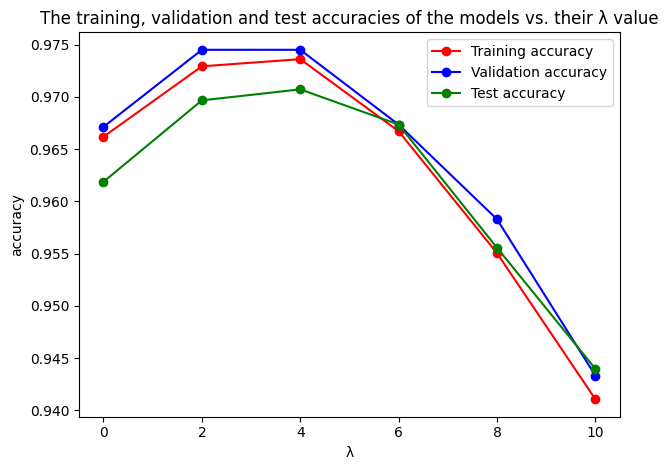

In [ ]:

def Q_6_1_1():
  # init a array to save all the models
  models = train_models()

  # init a array to save all the results
  results = np.array([])

  # init a lists to save each result
  training_accuracy = []
  validation_accuracy = []
  test_accuracy = []

  for mod in models:
    # add results to np array
    results = np.append(results, mod.accuracy_training)
    results = np.append(results, mod.accuracy_validation)
    results = np.append(results, mod.accuracy_test)

    training_accuracy.append(mod.accuracy_training)
    validation_accuracy.append(mod.accuracy_validation)
    test_accuracy.append(mod.accuracy_test)

  # Reshape the array to (6, 3)
  results_re = np.column_stack(results).reshape(6, 3)
  print(results)

  df = chart_data(LAMBDA , TRINING_LABEL , results_re)
  print(df)


  plt.plot( LAMBDA, training_accuracy, marker='o', color='r', label=TRAINING_LABEL[0])
  plt.plot(LAMBDA, validation_accuracy, marker='o', color='b', label=TRAINING_LABEL[1])
  plt.plot(LAMBDA, test_accuracy, marker='o', color='g', label=TRAINING_LABEL[2])

  plt.title('The training, validation and test accuracies of the models vs. their λ value')
  plt.xlabel('λ')
  plt.ylabel('accuracy')
  plt.legend()
  plt.tight_layout()
  plt.show()



Q_6_1_1()



Report the test accuracy of the best model according to the validation set.

In [ ]:
def Q_6_1_2():

  # train all the models
  models = train_models()

  # sort the models by VALIDATION Accuracy
  sorted_models = sort_model(models , VALIDATION)

  print(sorted_models[-1])

Q_6_1_2()

Ridge_Regression Model:
Lambda: 4
Weight Vector (w): [ 0.17001167 -0.07868581]
Training Accuracy: 0.9736093552465234
Validation Accuracy: 0.9745048461862621
Test Accuracy: 0.9707183484305877



plot the prediction space of the best and worst λ’s according using the validation set

Ridge_Regression Model:
Lambda: 4
Weight Vector (w): [ 0.17001167 -0.07868581]
Training Accuracy: 0.9736093552465234
Validation Accuracy: 0.9745048461862621
Test Accuracy: 0.9707183484305877

Ridge_Regression Model:
Lambda: 10
Weight Vector (w): [ 0.1198041  -0.05402159]
Training Accuracy: 0.941055625790139
Validation Accuracy: 0.9433206911083017
Test Accuracy: 0.9439646092268801

(57600,)


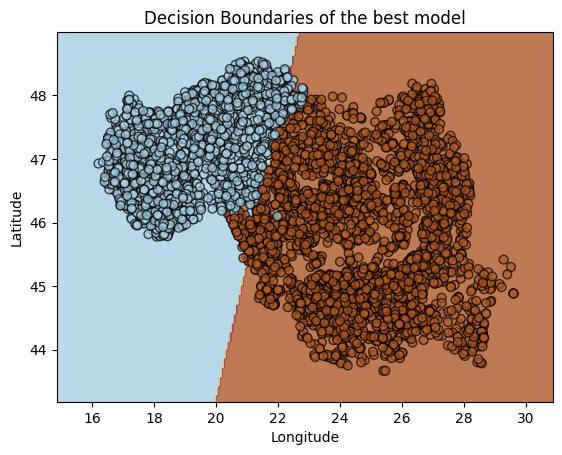

(57600,)


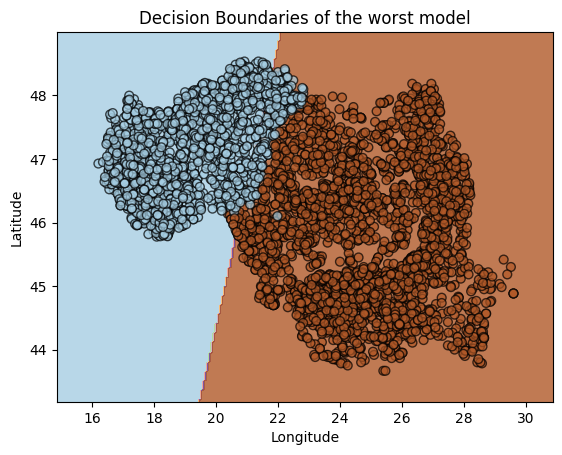

In [ ]:
def Q_6_2_1():

  #
  models = train_models()

  sorted_models = sort_model(models , VALIDATION)

  # Get the best and worst model
  best_model = sorted_models[-1]
  worst_model = sorted_models[0]

  print(best_model)
  print(worst_model)

  # plot
  plot_decision_boundaries(best_model , X_test , Y_test , BEST_CASE )
  plot_decision_boundaries(worst_model , X_test , Y_test , WORST_CASE )

Q_6_2_1()


# **7 Gradient Descent in NumPy**

 implement a gradient descent and optimize an input according to it. Our function will be:

f(x,y)=(x−3)2 +(y−5)2

In [ ]:
# Define our simple function
def my_gradient(x , y):
    # Div the x varible
    grad_with_x =  (x - 3) *2

    # Div the y varible
    grad_with_y =  (y - 5) *2

    return grad_with_x, grad_with_y



def Q_7_gradient_descent():
    x = 0
    y = 0
    # Initialize your (x,y) vector to be (0, 0).
    vec = np.zeros((ITERATORS_7, 2))
    vec[0] = [x, y]

    for i in range(ITERATORS_7):

        # Calculate the gradient
        grad_x, grad_y = my_gradient(x, y)

        # Use the learning rate's to optimize the answer
        x -= LEARNING_RATE_7 * grad_x

        y -= LEARNING_RATE_7 * grad_y

        vec[i] = [x, y]
    return vec


Plot your optimized vector through the iterations (x axis - x, y axis - y). Color the points by the “time” (iterations).


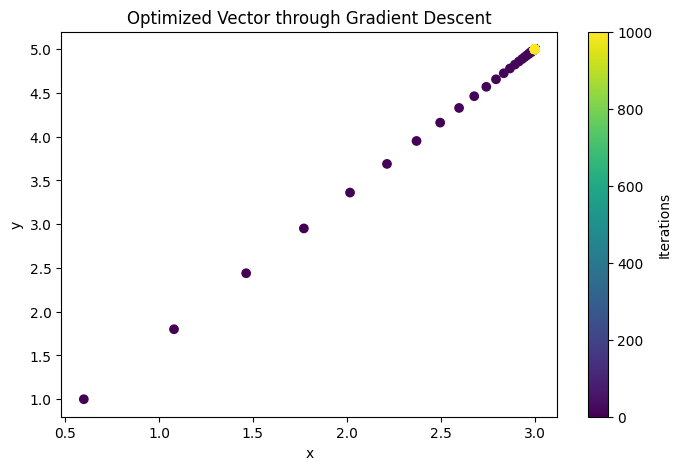

Final optimized point: [3. 5.]


In [ ]:
def plot_optimized_points():
    optimized_points = Q_7_gradient_descent()

    # extract the x and y values from the optimized_points array
    x_values = optimized_points[:, 0]
    y_values = optimized_points[:, 1]

    # creates a new figure for the plot with a specified size
    plt.figure(figsize=(8, 5))

    #
    plt.scatter(x_values, y_values, c=np.arange(len(optimized_points)), cmap='viridis', marker='o')
    plt.colorbar(label='Iterations')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Optimized Vector through Gradient Descent')
    plt.show()

    final_optimized_point = optimized_points[-1]
    print("Final optimized point:", final_optimized_point)

plot_optimized_points()

# **8 PyTorch: A Powerful Library for Gradient Based Methods**




# **9 Logistic Regression - Stochastic Gradient De- scent**

In [ ]:
class Logistic_Regression(nn.Module):

    def __init__(self, input_dim, output_dim):
        super(Logistic_Regression, self).__init__()

        ########## YOUR CODE HERE ##########

        # define a linear operation.
        self.linear = nn.Linear(in_features=input_dim, out_features=output_dim)  # linear optimizable operation

        self.results = []

        self.rate = 0

        self.ridge = ""

    def forward(self, x):
        """
        Computes the output of the linear operator.
        :param x: The input to the linear operator.
        :return: The transformed input.
        """
        # compute the output of the linear operator

        ########## YOUR CODE HERE ##########

        # return the transformed input.
        # first perform the linear operation
        # should be a single line of code.

        return self.linear(x)

    def predict(self, x):
        """
        THIS FUNCTION IS NOT NEEDED FOR PYTORCH. JUST FOR OUR VISUALIZATION
        """
        x = torch.from_numpy(x).float().to(self.linear.weight.data.device)
        x = self.forward(x)
        x = nn.functional.softmax(x, dim=1)
        x = x.detach().cpu().numpy()
        x = np.argmax(x, axis=1)
        return x

    def set_results(self, results):
        self.results = results

    def get_results(self):
        return self.results

    def get_rate(self):
        return self.rate

    def set_rate(self , rate):
        self.rate = rate

    def set_ridge(self , lambd):
        self.ridge = Ridge_Regression(lambd)



In [ ]:
# Create a simple dataset and DataLoader
class Data_base(torch.utils.data.Dataset):
    """
    Any dataset should inherit from torch.utils.data.Dataset and override the __len__ and __getitem__ methods.
    __init__ is optional.
    __len__ should return the size of the dataset.
    __getitem__ should return a tuple (data, label) for the given index.
    """

    def __init__(self,X , Y ):
        self.data = torch.tensor(X)
        self.labels = torch.tensor(Y)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

In [ ]:
# load_data_bases
# Instantiate the dataset and DataLoader
train_dataset = Data_base(X_train , Y_train)
test_dataset = Data_base(X_test , Y_test)
validation_dataset = Data_base(X_validation, Y_validation)

n_classes = len(torch.unique(train_dataset.labels))

# creates a PyTorch DataLoader object named
train_dataset_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataset_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)
validation_dataset_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=32, shuffle=True)

In [ ]:
def evaluate_model(model, data_loader,criterion ,data_set ,device):
    """
    Evaluate the model on the givn set and compute accuracy and loss.

    Args:
    - model: The PyTorch model to be evaluated.
    - test_loader: The DataLoader for the set.
    - device: The device (e.g., 'cuda' or 'cpu') on which the evaluation should be performed.

    Returns:
    - accuracy: The accuracy and the loss of the model on the  set.
    """
    model.eval()  # set the model to evaluation mode
    correct_predictions = 0.
    loss_values = []

    for inputs, labels in data_loader:
        inputs, labels = inputs.to(device, dtype=torch.float), labels.to(device)
        outputs = model(inputs)
        outputs = nn.functional.softmax(outputs, dim=1)
        _, predicted = torch.max(outputs, dim=1)
        correct_predictions += torch.sum(predicted == labels).item()
        #loss = criterion(outputs.squeeze(), labels)
        loss = criterion(outputs, labels)
        loss_values.append(loss.item())

    total_samples = len(data_loader.dataset)
    accuracy = correct_predictions / total_samples
    loss = np.mean(loss_values)
    return accuracy , loss

In [ ]:
np.random.seed(42)
torch.manual_seed(42)
# Make a global there wont need to load each time
log_models = []
results = []
def Q_9():
    # Before running your training script
    torch.cuda.empty_cache()
    i =0
    for l_rate in LEARNING_RATES_9:

        # Instantiate the model, loss function, and optimizer for each rate
        model = Logistic_Regression(2, n_classes)
        model.to(device)
        model.set_rate(l_rate)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=l_rate)

        # For every rate
        mod_res = []

        # Train the model for a few epochs with GPU acceleration
        # the list we will save the data for each epoch

        for epoch in range(10):
            # For every epoch
            ep_res = []

            loss_values = []
            ep_correct_preds = 0.
            model.train()  # set the model to training mode

            # train the model
            for inputs, labels in train_dataset_loader:
                inputs, labels = inputs.to(device, dtype=torch.float), labels.to(device)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs.squeeze(), labels)
                loss.backward()
                optimizer.step()

                # Store the loss values for plotting
                loss_values.append(loss.item())
                ep_correct_preds += torch.sum(torch.argmax(outputs, dim=1) == labels).item()

            # During training compute the training accuracy and loss in every epoch
            ep_res.append( ep_correct_preds / len(train_dataset))
            ep_res.append(np.mean(loss_values))


            #at the end of every epoch, iterate over the validation and test sets and keep
            # their losses accuracies for every epoch as well.

            # Test losses and accuracies
            t_acc , t_loss = evaluate_model(model , test_dataset_loader ,criterion, test_dataset ,device )

            # validation losses and accuracies
            v_acc , v_loss = evaluate_model(model , validation_dataset_loader ,criterion,validation_dataset ,device )

            # add to array
            ep_res.append(t_acc)
            ep_res.append(t_loss)
            ep_res.append(v_acc)
            ep_res.append(v_loss)
            mod_res.append(ep_res)
            # ep_test_accuracy[epoch] = [t_acc , t_loss]
            # ep_validation_accuracy[epoch] = [v_acc , v_loss]

        # saving the model
        torch.save(model.state_dict(), f'./model_{l_rate}.pt')

        # saving the results
        results.append(mod_res)
        model.set_results(mod_res)

        log_models.append(model)



In [ ]:
def plot_results():
    Q_9()
    chart = np.zeros((NUM_EPOCHS_9, 6))
    for mod in log_models:

        # get the results for the model
        res = mod.get_results()

        # chart the results
        print("Learning rate =", mod.get_rate())
        #df = chart_data(EPOCHS , CHART_HEAD_9 , res)
        df = pd.DataFrame(res, index=EPOCHS, columns=CHART_HEAD_9  )
        print(df)

plot_results()

Learning rate = 0.1
10
    Train accuracy  Train loss  Test accuracy  Test loss  Validation accuracy  \
1         0.901522    4.900563       0.934274   0.377862             0.942689   
2         0.945638    0.927066       0.938487   0.373632             0.937632   
3         0.952960    0.793994       0.963345   0.348424             0.970712   
4         0.955041    0.700849       0.906889   0.406768             0.907712   
5         0.955779    0.721143       0.970508   0.342139             0.971555   
6         0.958202    0.681186       0.959132   0.353190             0.966077   
7         0.957095    0.676630       0.968612   0.343616             0.969027   
8         0.958307    0.653847       0.968612   0.344411             0.968605   
9         0.957412    0.642460       0.971561   0.341064             0.976612   
10        0.960651    0.627038       0.895724   0.415988             0.903076   

    Validation loss  
1          0.369389  
2          0.374471  
3          0.342103

Best model visualization on the test set (learning rate = 0.01):
(57600,)


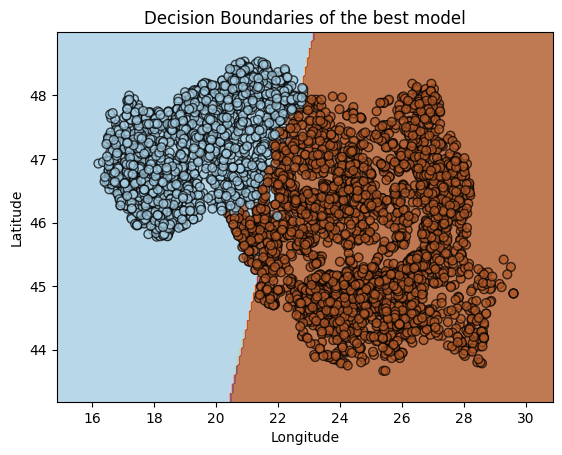

In [ ]:

def Q_9_1():
    torch.cuda.empty_cache()


    # Use np.argsort to get the indices that would sort the list
    sorted_indices = np.argsort([res[-1][4] for res in results])
    sorted_models = [log_models[i] for i in sorted_indices]

    # Get the index of the model with the highest validation accuracy
    best_model_index = sorted_indices[-1]

    # Load the best model
    #n_classes = len(torch.unique(train_dataset.labels))
    best_model = Logistic_Regression(2, n_classes)
    best_model.load_state_dict(torch.load(f'model_{LEARNING_RATES_9[best_model_index]}.pt'))

    print(f"Best model visualization on the test set (learning rate = {LEARNING_RATES_9[best_model_index]}):")
    plot_decision_boundaries(best_model , X_test , Y_test , BEST_CASE )

Q_9_1()

Using best model ,it plots the training, validation and test losses over the training epochs in the same figure.

[0 2 1]
  Train loss Test loss Validation loss
0   0.400229  0.449313        0.441814
1   0.107196  0.349180        0.346730
2   0.092722  0.353951        0.349231
3   0.103375  0.365456        0.364859
4   0.090864  0.346012        0.343583
5   0.093326  0.348381        0.343779
6   0.086446  0.416149        0.408935
7   0.086776  0.347876        0.343908
8   0.085336  0.368100        0.368056
9   0.084005  0.344311        0.341173


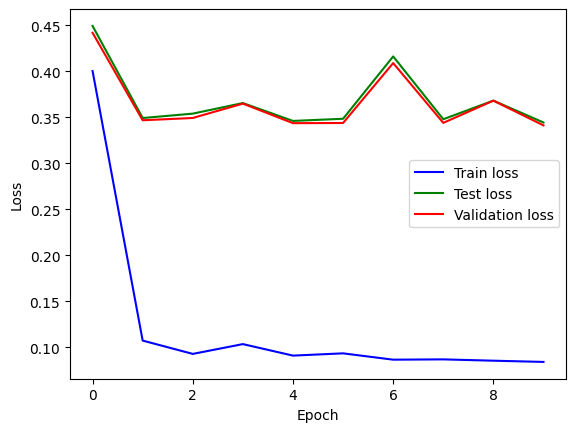

In [ ]:
def Q_9_2():
    #models , results = Q_9()

    # Use np.argsort to get the indices that would sort the list
    sorted_indices = np.argsort([res[-1][4] for res in results])
    sorted_models = [log_models[i] for i in sorted_indices]

    #Get the index of the model with the highest validation accuracy
    best_model_index = sorted_indices[-1]

    best_model = log_models[best_model_index]


    best_results = best_model.get_results()
    # Transpose the list to convert it into a 6x10 array
    reshaped_results = pd.DataFrame(best_results, columns=[CHART_HEAD_9])

    # Select only the columns you want (1, 3, 5)
    selected_columns = reshaped_results[CHART_HEAD_9_2]

    # Print the DataFrame
    print(selected_columns)


    # # Plot the training, validation, and test losses over the training epochs
    plt.tilte( "training, validation and test losses vs training epochs")
    plt.plot(selected_columns[CHART_HEAD_9_2[0]], 'b' ,label=CHART_HEAD_9_2[0])
    plt.plot(selected_columns[CHART_HEAD_9_2[1]],'g' ,label=CHART_HEAD_9_2[1])
    plt.plot(selected_columns[CHART_HEAD_9_2[2]],'r' ,label=CHART_HEAD_9_2[2])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.legend()
    plt.show()
Q_9_2()





# 9.4 Questions - Multi-Class Case **bold text**

In [ ]:
    # Load the training files
mult_x_train, mult_y_train = read_data("/content/train_multiclass.csv")

    # Load the test files
mult_x_test, mult_y_test = read_data("/content/test_multiclass.csv")

    # Load the validation files
mult_x_validation, mult_y_validation = read_data("/content/validation_multiclass.csv")

    # load_data_bases
# Instantiate the dataset and DataLoader
mult_train_dataset = Data_base(mult_x_train, mult_y_train)
mult_test_dataset = Data_base(mult_x_test, mult_y_test)
mult_validation_dataset = Data_base(mult_x_validation, mult_y_validation)

mult_n_classes = len(torch.unique(mult_train_dataset.labels))

# creates a PyTorch DataLoader object named
mult_train_dataset_loader = torch.utils.data.DataLoader(mult_train_dataset, batch_size=32, shuffle=True)
mult_test_dataset_loader = torch.utils.data.DataLoader(mult_test_dataset, batch_size=32, shuffle=True)
mult_validation_dataset_loader = torch.utils.data.DataLoader(mult_validation_dataset, batch_size=32, shuffle=True)


In [ ]:

# Make a global there wont need to load each time
log_models_multi = []
results_milti = []
def Q_9_4():
    # Before running your training script
    torch.cuda.empty_cache()
    i =0
    for l_rate in LEARNING_RATES_9_4:

        # Instantiate the model, loss function, and optimizer for each rate
        model = Logistic_Regression(2, mult_n_classes)
        model.to(device)
        model.set_rate(l_rate)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=l_rate)
        lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.3)

        # For every rate
        mod_res = []

        # Train the model for a few epochs with GPU acceleration
        # the list we will save the data for each epoch

        for epoch in range(NUM_EPOCHS_9_4):
            # For every epoch
            ep_res = []

            loss_values = []
            ep_correct_preds = 0.
            model.train()  # set the model to training mode

            # train the model
            for inputs, labels in mult_train_dataset_loader:
                inputs, labels = inputs.to(device, dtype=torch.float), labels.to(device)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs.squeeze(), labels)
                loss.backward()
                optimizer.step()

                # Store the loss values for plotting
                loss_values.append(loss.item())
                ep_correct_preds += torch.sum(torch.argmax(outputs, dim=1) == labels).item()

            # During training compute the training accuracy and loss in every epoch
            lr_scheduler.step()

            ep_res.append( ep_correct_preds / len(mult_train_dataset))
            ep_res.append(np.mean(loss_values))


            #at the end of every epoch, iterate over the validation and test sets and keep
            # their losses accuracies for every epoch as well.

            # Test losses and accuracies
            t_acc , t_loss = evaluate_model(model , mult_test_dataset_loader ,criterion, mult_test_dataset ,device )

            # validation losses and accuracies
            v_acc , v_loss = evaluate_model(model , mult_validation_dataset_loader ,criterion,mult_validation_dataset ,device )

            # add to array
            ep_res.append(t_acc)
            ep_res.append(t_loss)
            ep_res.append(v_acc)
            ep_res.append(v_loss)
            mod_res.append(ep_res)

        # saving the model
        torch.save(model.state_dict(), f'./model_30_{l_rate}.pt')

        # saving the results
        results_milti.append(mod_res)
        model.set_results(mod_res)

        log_models_multi.append(model)

In [ ]:
def plot_results_2():
    Q_9_4()
    chart = np.zeros((NUM_EPOCHS_9_4, 6))
    # go over all models
    for mod in log_models_multi:

        # get the model results for each epoch
        res = mod.get_results()

        # chart and print
        print("Learning rate =", mod.get_rate())
        df = chart_data(EPOCHS_4 , CHART_HEAD_9 , res)
        print(df)

plot_results_2()


Learning rate = 0.01
    Train accuracy  Train loss  Test accuracy  Test loss  Validation accuracy  \
0         0.680851    1.357604       0.512941   1.374026             0.510636   
1         0.729494    0.973096       0.529393   1.345973             0.532799   
2         0.731969    0.973065       0.556114   1.314394             0.556638   
3         0.735945    0.937587       0.516033   1.377944             0.515614   
4         0.738840    0.925142       0.563712   1.319493             0.564026   
5         0.806050    0.523177       0.813371   1.112944             0.813843   
6         0.811336    0.504601       0.828199   1.126899             0.830556   
7         0.811355    0.493617       0.781725   1.146696             0.784816   
8         0.813445    0.485805       0.825579   1.135770             0.825422   
9         0.814015    0.480478       0.816515   1.118607             0.815572   
10        0.833866    0.458958       0.842974   1.125619             0.842607   
11     

The plot of test and validation accuracies of the model vs. their learning rate value (x axis - learning rate, y axis - accuracy).

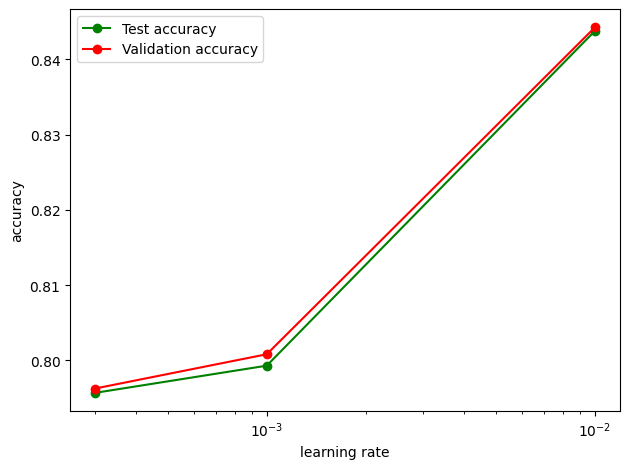

model rate = 0.01 test accuracy = 0.8438122183799643


In [ ]:
def Q_9_2_1():
    # get the last accuracies of the chart epoch = 30
    test_accuracies = [rate[29][2] for rate in results_milti]
    validation_accuracies = [rate[29][4] for rate in results_milti]

    # Plotting accuracies
    plt.plot(LEARNING_RATES_9_4, test_accuracies, marker='o', color='g', label=CHART_HEAD_9[2])
    plt.plot(LEARNING_RATES_9_4, validation_accuracies, marker='o', color='r',label=CHART_HEAD_9[4])

    plt.xlabel('learning rate')
    plt.ylabel('accuracy')
    plt.xscale('log')
    plt.legend()
    plt.tight_layout()
    plt.show()


    #Get the index of the model with the highest validation accuracy
    best_model_index = np.argmax(validation_accuracies)

    l_rate = LEARNING_RATES_9_4[best_model_index]

    print("model rate =",l_rate ,  "test accuracy =", test_accuracies[best_model_index])


Q_9_2_1()

the model with highest validation accuracy. Plot its training, validation and test losses over the training epochs in the same figure

   Train loss Test loss Validation loss
0    1.357604  1.374026        1.375052
1    0.973096  1.345973        1.344291
2    0.973065  1.314394        1.314210
3    0.937587  1.377944        1.377939
4    0.925142  1.319493        1.319434
5    0.523177  1.112944        1.112291
6    0.504601  1.126899        1.125337
7    0.493617  1.146696        1.145195
8    0.485805  1.135770        1.134309
9    0.480478  1.118607        1.118022
10   0.458958  1.125619        1.124764
11   0.457413  1.128393        1.127273
12   0.456637  1.140937        1.139943
13   0.455386  1.127490        1.126856
14   0.454312  1.131349        1.130446
15   0.450513  1.130466        1.129708
16   0.450319  1.134650        1.133857
17   0.450004  1.130172        1.129232
18   0.449808  1.132577        1.131775
19   0.449511  1.129374        1.128765
20   0.448505  1.129662        1.128729
21   0.448359  1.132353        1.131382
22   0.448287  1.132065        1.131087
23   0.448277  1.132864        1.132108


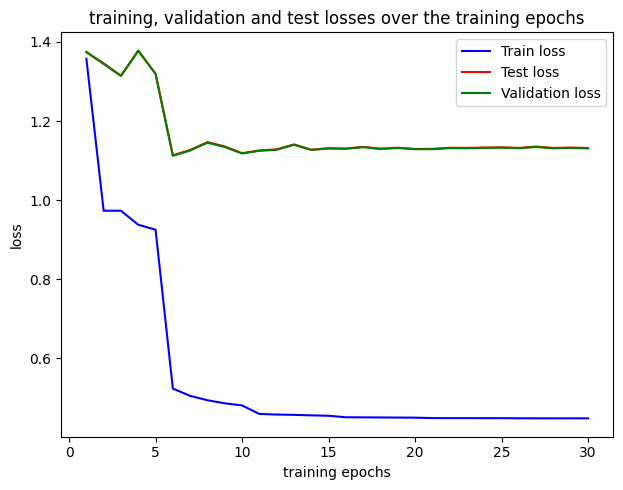

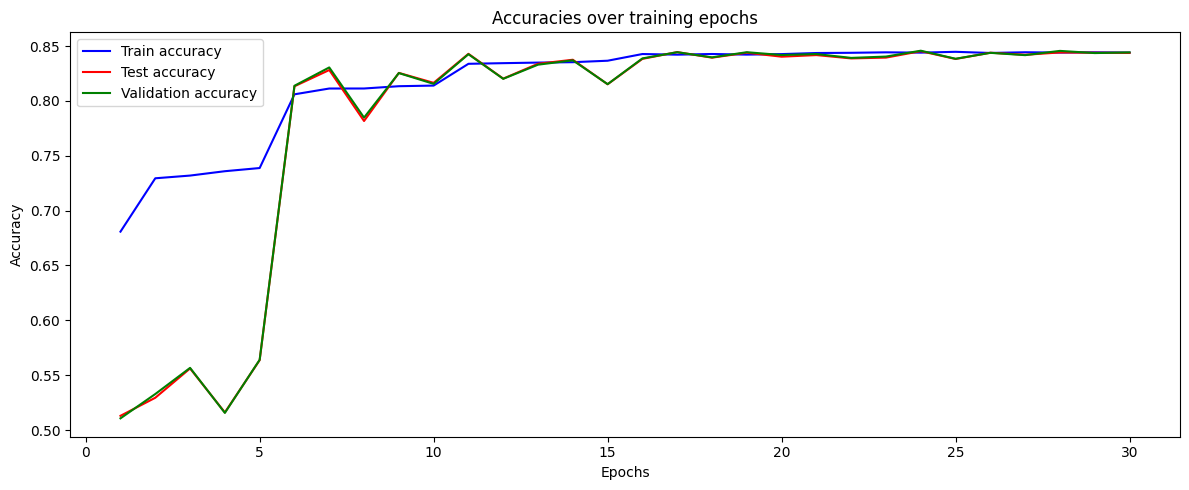

In [ ]:
def Q_9_2_3():
    # Choose the model with highest validation accuracy
    validation_accuracies = [rate[29][4] for rate in results_milti]

    #Get the index of the model with the highest validation accuracy
    best_model_index = np.argmax(validation_accuracies)

    best_model = log_models_multi[best_model_index]

    best_results = best_model.get_results()

    reshaped_results = pd.DataFrame(best_results, columns=[CHART_HEAD_9])


    # Select only the columns you want (1, 3, 5)
    selected_columns = reshaped_results[CHART_HEAD_9_2]
    print(selected_columns)


    # Plotting losses
    epochs = range(1, 31)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, selected_columns[CHART_HEAD_9_2[0]], 'b', label=CHART_HEAD_9_2[0])
    plt.plot(epochs, selected_columns[CHART_HEAD_9_2[1]], 'r', label=CHART_HEAD_9_2[1])
    plt.plot(epochs, selected_columns[CHART_HEAD_9_2[2]], 'g', label=CHART_HEAD_9_2[2])



    plt.title('training, validation and test losses over the training epochs')
    plt.xlabel('training epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # validation & test accuracies in every epoch
    plt.figure(figsize=(12, 5))
    #plt.subplot(1, 2, 2)
    plt.plot(epochs, reshaped_results[CHART_HEAD_9[0]], 'b', label=CHART_HEAD_9[0])
    plt.plot(epochs, reshaped_results[CHART_HEAD_9[2]], 'r', label=CHART_HEAD_9[2])
    plt.plot(epochs, reshaped_results[CHART_HEAD_9[4]], 'g', label=CHART_HEAD_9[4])

    plt.title('Accuracies over training epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

Q_9_2_3()

In [ ]:
def tree_data(depth):
     tree_classifier = DecisionTreeClassifier(max_depth=depth)
     tree_classifier.fit(mult_x_train, mult_y_train)

     # Make predictions on the test data
     y_pred_train = tree_classifier.predict(mult_x_train)
     # Compute the accuracy of the predictions
     train_tree_accuracy = np.mean(y_pred_train == mult_y_train)

     # Make predictions on the test data
     y_pred_test = tree_classifier.predict(mult_x_test)
     # Compute the accuracy of the predictions
     test_tree_accuracy = np.mean(y_pred_test == mult_y_test)

     # Make predictions on the test data
     y_pred_val = tree_classifier.predict(mult_x_validation)
     # Compute the accuracy of the predictions
     val_tree_accuracy = np.mean(y_pred_val == mult_y_validation)

     return tree_classifier , train_tree_accuracy , test_tree_accuracy , val_tree_accuracy









   Train Accuracy  Test Accuracy  Validation Accuracy
0        0.751094       0.750236             0.749764
(57840,)


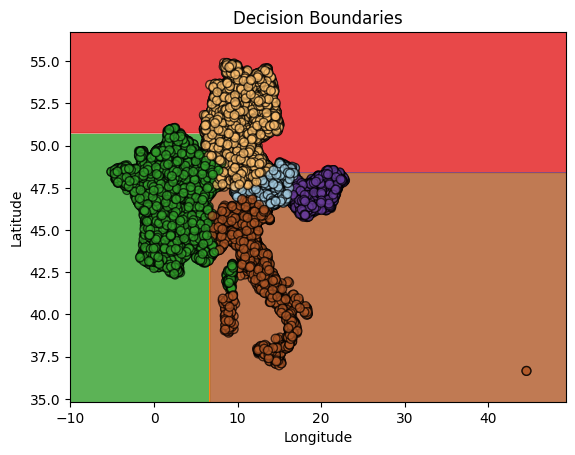

In [ ]:
def Q_9_2_4():
    tree_classifier , train_tree_accuracy , test_tree_accuracy , val_tree_accuracy = tree_data(2)
    tree_accuracy = [[train_tree_accuracy, test_tree_accuracy, val_tree_accuracy]]
    # Creating DataFrame with single values
    tree_accuracy_chart = pd.DataFrame(data=tree_accuracy, columns=CHART_HEAD_9_4)



    print(tree_accuracy_chart)
    plot_decision_boundaries(tree_classifier, mult_x_test, mult_y_test)

Q_9_2_4()

   Train Accuracy  Test Accuracy  Validation Accuracy
0        0.997361       0.996856             0.996175
(57840,)


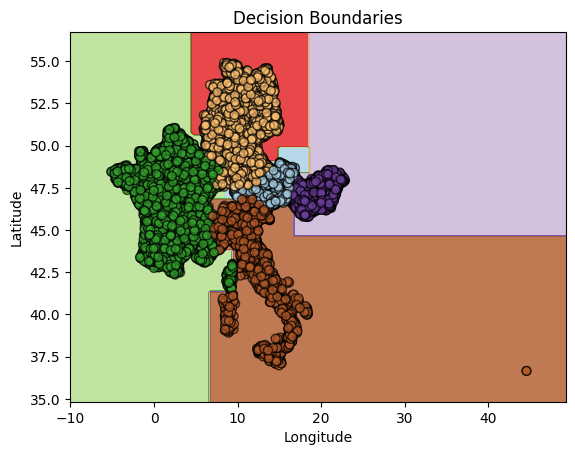

In [ ]:
def Q_9_2_5():

    tree_classifier , train_tree_accuracy , test_tree_accuracy , val_tree_accuracy = tree_data(10)
    tree_accuracy = [[train_tree_accuracy, test_tree_accuracy, val_tree_accuracy]]

    # Creating DataFrame with single values
    tree_accuracy_chart = pd.DataFrame(data=tree_accuracy, columns=CHART_HEAD_9_4)



    print(tree_accuracy_chart)
    plot_decision_boundaries(tree_classifier, mult_x_test, mult_y_test)

Q_9_2_5()